In [12]:
# kaggle path configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:

!kaggle datasets download -d omkargurav/face-mask-dataset     # API to fetch data from kaggle

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'  # path of dataset zip

with ZipFile(dataset,'r') as zip:   # extract zip
  zip.extractall()


In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam




In [16]:
with_mask_imgs = os.listdir('/content/data/with_mask')
without_mask_imgs = os.listdir('/content/data/without_mask')
print('# with mask images: ',len(with_mask_imgs))
print('# without mask images: ',len(without_mask_imgs))

# with mask images:  3725
# without mask images:  3828


In [17]:
print("with mask: ",with_mask_imgs[0:5])
print("with mask: ",without_mask_imgs[0:5])

with mask:  ['with_mask_1304.jpg', 'with_mask_3471.jpg', 'with_mask_2667.jpg', 'with_mask_280.jpg', 'with_mask_1606.jpg']
with mask:  ['without_mask_2460.jpg', 'without_mask_807.jpg', 'without_mask_2134.jpg', 'without_mask_1620.jpg', 'without_mask_3306.jpg']


## **Image** **processing**

In [18]:
# create labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828
print(with_mask_labels)
print(without_mask_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [19]:
# sum of lables
labels = with_mask_labels + without_mask_labels


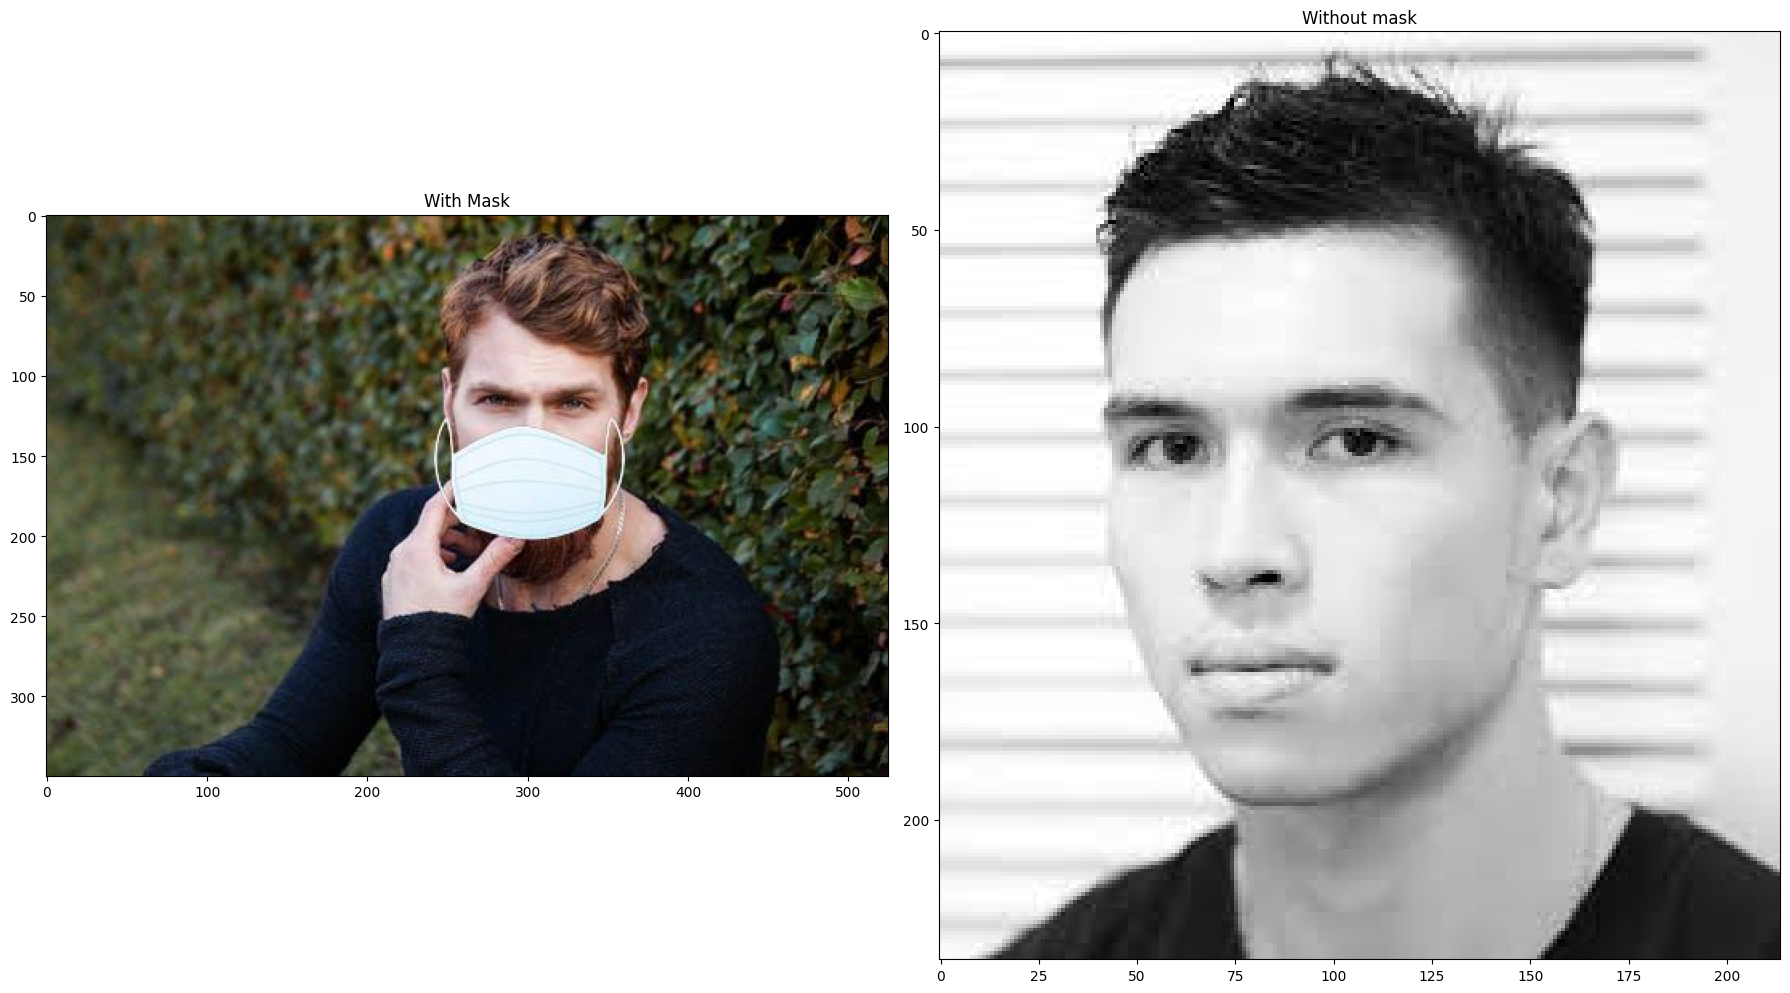

In [20]:
img = mpimg.imread('/content/data/with_mask/with_mask_1.jpg')

img2 = mpimg.imread('/content/data/without_mask/without_mask_2739.jpg')
fig,ax = plt.subplots(1,2,figsize = (18,15))
ax[0].imshow(img)
ax[0].set_title('With Mask')
ax[1].imshow(img2)
ax[1].set_title('Without mask')
plt.tight_layout()
plt.show()

In [21]:
# Resize Images
with_mask_path = '/content/data/with_mask'
without_mask_path = '/content/data/without_mask'
data = []

#with mask images resize and convert as RGB
for img_file in with_mask_imgs:
  image = Image.open(with_mask_path+'/'+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

#without mask images resize and convert as RGB
for img_file in without_mask_imgs:
  image = Image.open(without_mask_path +'/'+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

print(len(data))

7553


In [22]:
data[0]

array([[[211, 213, 199],
        [211, 213, 199],
        [212, 214, 200],
        ...,
        [135,  95, 109],
        [150,  99, 107],
        [136,  82,  96]],

       [[211, 213, 199],
        [213, 215, 201],
        [214, 216, 202],
        ...,
        [124,  91, 108],
        [137,  96, 106],
        [140,  95, 107]],

       [[211, 213, 199],
        [214, 216, 202],
        [212, 214, 200],
        ...,
        [ 71,  52,  73],
        [ 99,  75,  89],
        [117,  85, 101]],

       ...,

       [[ 85,  97, 111],
        [ 81,  96, 109],
        [ 81,  99, 111],
        ...,
        [176, 182, 174],
        [181, 185, 174],
        [184, 187, 179]],

       [[ 89, 102, 116],
        [ 85, 100, 113],
        [ 83, 102, 114],
        ...,
        [176, 182, 174],
        [180, 184, 173],
        [182, 185, 177]],

       [[ 89, 103, 117],
        [ 83,  99, 112],
        [ 82, 101, 113],
        ...,
        [175, 180, 173],
        [178, 182, 172],
        [177, 180, 173]]

In [23]:
print(type(data[0]))
print(data[0].shape)

<class 'numpy.ndarray'>
(128, 128, 3)


In [24]:
# convert data,labels list as array
X = np.array(data)
Y = np.array(labels)

## **Split Data**

In [25]:

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [26]:
# divide by max value to convert range 0 to 1
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [27]:
X_train[0]

array([[[135, 144, 149],
        [137, 147, 151],
        [139, 150, 154],
        ...,
        [123, 136, 181],
        [122, 134, 179],
        [ 73,  79, 115]],

       [[137, 146, 151],
        [138, 148, 153],
        [141, 152, 156],
        ...,
        [118, 131, 176],
        [124, 136, 181],
        [ 83,  89, 125]],

       [[137, 147, 152],
        [139, 149, 154],
        [140, 151, 155],
        ...,
        [134, 146, 192],
        [136, 147, 195],
        [ 98, 103, 146]],

       ...,

       [[ 68,  69,  61],
        [ 55,  56,  48],
        [ 58,  59,  51],
        ...,
        [177, 195, 151],
        [172, 187, 150],
        [164, 178, 140]],

       [[ 70,  71,  63],
        [ 58,  59,  51],
        [ 53,  54,  46],
        ...,
        [221, 222, 186],
        [215, 218, 180],
        [208, 214, 174]],

       [[ 72,  73,  65],
        [ 64,  65,  57],
        [ 49,  50,  42],
        ...,
        [228, 221, 204],
        [224, 220, 200],
        [219, 218, 192]]

In [28]:
print('\nBefore scaling : \n',X_train[0])
print('\nAfter Scaling : \n',X_train_scaled[0])



Before scaling : 
 [[[135 144 149]
  [137 147 151]
  [139 150 154]
  ...
  [123 136 181]
  [122 134 179]
  [ 73  79 115]]

 [[137 146 151]
  [138 148 153]
  [141 152 156]
  ...
  [118 131 176]
  [124 136 181]
  [ 83  89 125]]

 [[137 147 152]
  [139 149 154]
  [140 151 155]
  ...
  [134 146 192]
  [136 147 195]
  [ 98 103 146]]

 ...

 [[ 68  69  61]
  [ 55  56  48]
  [ 58  59  51]
  ...
  [177 195 151]
  [172 187 150]
  [164 178 140]]

 [[ 70  71  63]
  [ 58  59  51]
  [ 53  54  46]
  ...
  [221 222 186]
  [215 218 180]
  [208 214 174]]

 [[ 72  73  65]
  [ 64  65  57]
  [ 49  50  42]
  ...
  [228 221 204]
  [224 220 200]
  [219 218 192]]]

After Scaling : 
 [[[0.52941176 0.56470588 0.58431373]
  [0.5372549  0.57647059 0.59215686]
  [0.54509804 0.58823529 0.60392157]
  ...
  [0.48235294 0.53333333 0.70980392]
  [0.47843137 0.5254902  0.70196078]
  [0.28627451 0.30980392 0.45098039]]

 [[0.5372549  0.57254902 0.59215686]
  [0.54117647 0.58039216 0.6       ]
  [0.55294118 0.59607843 0.

## **Build CNN**

In [29]:
class_count = 2
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation ='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(class_count, activation = 'sigmoid'))


In [30]:
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy',metrics = ['acc'])

In [31]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1, epochs = 10)

Epoch 1/10
170/170 [==============================] - 12s 39ms/step - loss: 0.5584 - acc: 0.7563 - val_loss: 0.3080 - val_acc: 0.8777
Epoch 2/10
170/170 [==============================] - 5s 27ms/step - loss: 0.3333 - acc: 0.8678 - val_loss: 0.2727 - val_acc: 0.8826
Epoch 3/10
170/170 [==============================] - 3s 20ms/step - loss: 0.2740 - acc: 0.8909 - val_loss: 0.2581 - val_acc: 0.8959
Epoch 4/10
170/170 [==============================] - 3s 20ms/step - loss: 0.2276 - acc: 0.9082 - val_loss: 0.2679 - val_acc: 0.9140
Epoch 5/10
170/170 [==============================] - 3s 20ms/step - loss: 0.1934 - acc: 0.9275 - val_loss: 0.2571 - val_acc: 0.9107
Epoch 6/10
170/170 [==============================] - 3s 19ms/step - loss: 0.1911 - acc: 0.9239 - val_loss: 0.3201 - val_acc: 0.9124
Epoch 7/10
170/170 [==============================] - 3s 19ms/step - loss: 0.1482 - acc: 0.9487 - val_loss: 0.3075 - val_acc: 0.8942
Epoch 8/10
170/170 [==============================] - 3s 20ms/step -

In [32]:
# Model Evaluation
loss,accuracy = model.evaluate(X_test_scaled, Y_test)
print('Accuracy: ', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2766 - acc: 0.9358
Accuracy:  0.9358041286468506


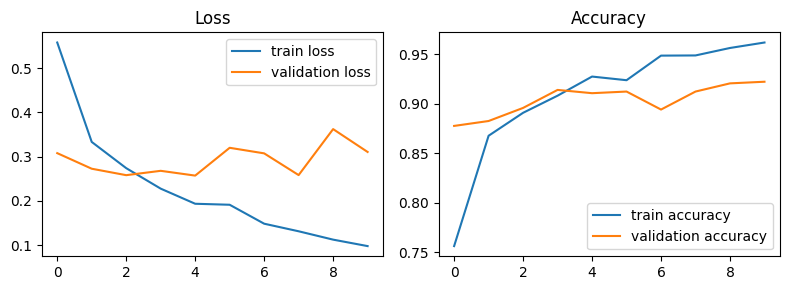

In [33]:
h = history
fig,ax = plt.subplots(1,2,figsize= (8,3))
ax[0].plot(h.history['loss'],label = 'train loss')
ax[0].plot(h.history['val_loss'],label = 'validation loss')
ax[0].set_title('Loss')
ax[0].legend()


ax[1].plot(h.history['acc'], label = 'train accuracy')
ax[1].plot(h.history['val_acc'],label = 'validation accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()


In [41]:
img_path = input('/content/')
image = cv2.imread(img_path)
cv2_imshow(image)
input_resized_image = cv2.resize(image,(128,128))
input_img_scaled = input_resized_image/255
input_image_reshaped = np.reshape(input_img_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('wear mask')

else:
  print('not wear mask')





Output hidden; open in https://colab.research.google.com to view.